# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from Kaggle although we have taken steps to pull this data into a publis s3 bucket: s3://sta9760-yelpdataset/yelp-light/*business.json

# Installation and Initial Setup
We begin by installing the necessary libraries that you may need to conduct your analysis. 

In [1]:
%%info

In [2]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1619573029665_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
jmespath                   0.10.0   
joblib                     0.16.0   
lxml                       4.5.2    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pip                        9.0.1    
py-dateutil                2.2      
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
setuptools                 28.8.0   
six                        1.13.0   
soupsieve                  1.9.5    
tqdm                       4.48.2   
wheel                      0.29.0   
windmill                   1.6

In [3]:
sc.install_pypi_package("pandas==1.0.3")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
sc.install_pypi_package("seaborn==0.11.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
sc.install_pypi_package("matplotlib")
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1619573029665_0001,pyspark,idle,Link,Link,✔


# Importing
Now, import the installed packages from the previous block below.

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data
We are finally ready to load data. Using spark load the data from S3 into a dataframe object that we can manipulate further down in our analysis.

In [7]:
df = spark.read.json('s3://sta9760s2021ira/yelpdata/*business.json' )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Overview of the data
Display the number of rows and columns in our dataset and the schema

In [8]:
print(f'Total columns: {len(df.dtypes)}')
print(f'Total Rows: {df.count()}')
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total columns: 14
Total Rows: 160585
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable 

# Display the first 5 rows with the following columns:

1. business_id
2. name
3. city
4. state
5. categories

In [43]:
# df.createOrReplaceTempView('Yelp')

# sqldf = spark.sql(
# '''
# SELECT business_id,name,city,state,categories 
# FROM Yelp
# LIMIT 5
# '''
# )

# sqldf.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
df.select('business_id','name','city','state','categories').show(5)#, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+--------------------+
|         business_id|                name|       city|state|          categories|
+--------------------+--------------------+-----------+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+--------------------+
only showing top 5 rows

# Analyzing Categories
Let's now answer this question: how many unique categories are represented in this dataset?

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

How many businesses are categorized as Active Life, for instance
What are the top 20 most popular categories available?

In [11]:
catdf = df.select('business_id','categories')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
catdf.show(4)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|6iYb2HFDywm3zjuRg...|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|Beauty & Spas, Ha...|
+--------------------+--------------------+
only showing top 4 rows

In [13]:
from pyspark.sql.functions import explode, split, trim, col
expdf = catdf.withColumn('categories',explode(split('categories',",")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
# Trim whitespace from the categories values
cleanDF = expdf.withColumn(
  "categories",
  trim(col("categories"))
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Display the first 5 rows of your association table below.

In [15]:
cleanDF.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|         business_id|  categories|
+--------------------+------------+
|6iYb2HFDywm3zjuRg...|  Gastropubs|
|6iYb2HFDywm3zjuRg...|        Food|
|6iYb2HFDywm3zjuRg...|Beer Gardens|
|6iYb2HFDywm3zjuRg...| Restaurants|
|6iYb2HFDywm3zjuRg...|        Bars|
+--------------------+------------+
only showing top 5 rows

# Total Unique Categories
Finally, we are ready to answer the question: what is the total number of unique categories available?

In [16]:
cleanDF.createOrReplaceTempView('UniqueCats')

spark.sql(
'''
SELECT count(DISTINCT categories) as Unique_Categories
FROM UniqueCats

'''
).show()

#sqldf.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+
|Unique_Categories|
+-----------------+
|             1330|
+-----------------+

# Top Categories By Business
Now let's find the top categories in this dataset by rolling up categories.

In [17]:
from pyspark.sql.functions import count,  col

catcounts = cleanDF.groupby('categories').agg(count('categories').alias('Total')).sort(col("Total").desc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
catcounts.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+-----+
|   categories|Total|
+-------------+-----+
|  Restaurants|50763|
|         Food|29469|
|     Shopping|26205|
|Beauty & Spas|16574|
|Home Services|16465|
+-------------+-----+
only showing top 5 rows

# Bar Chart of Top Categories
With this data available, let us now build a barchart of the top 20 categories.

In [19]:
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
top20 = catcounts.limit(20).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
top20 = pd.DataFrame(top20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

name 'pd' is not defined
Traceback (most recent call last):
NameError: name 'pd' is not defined



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

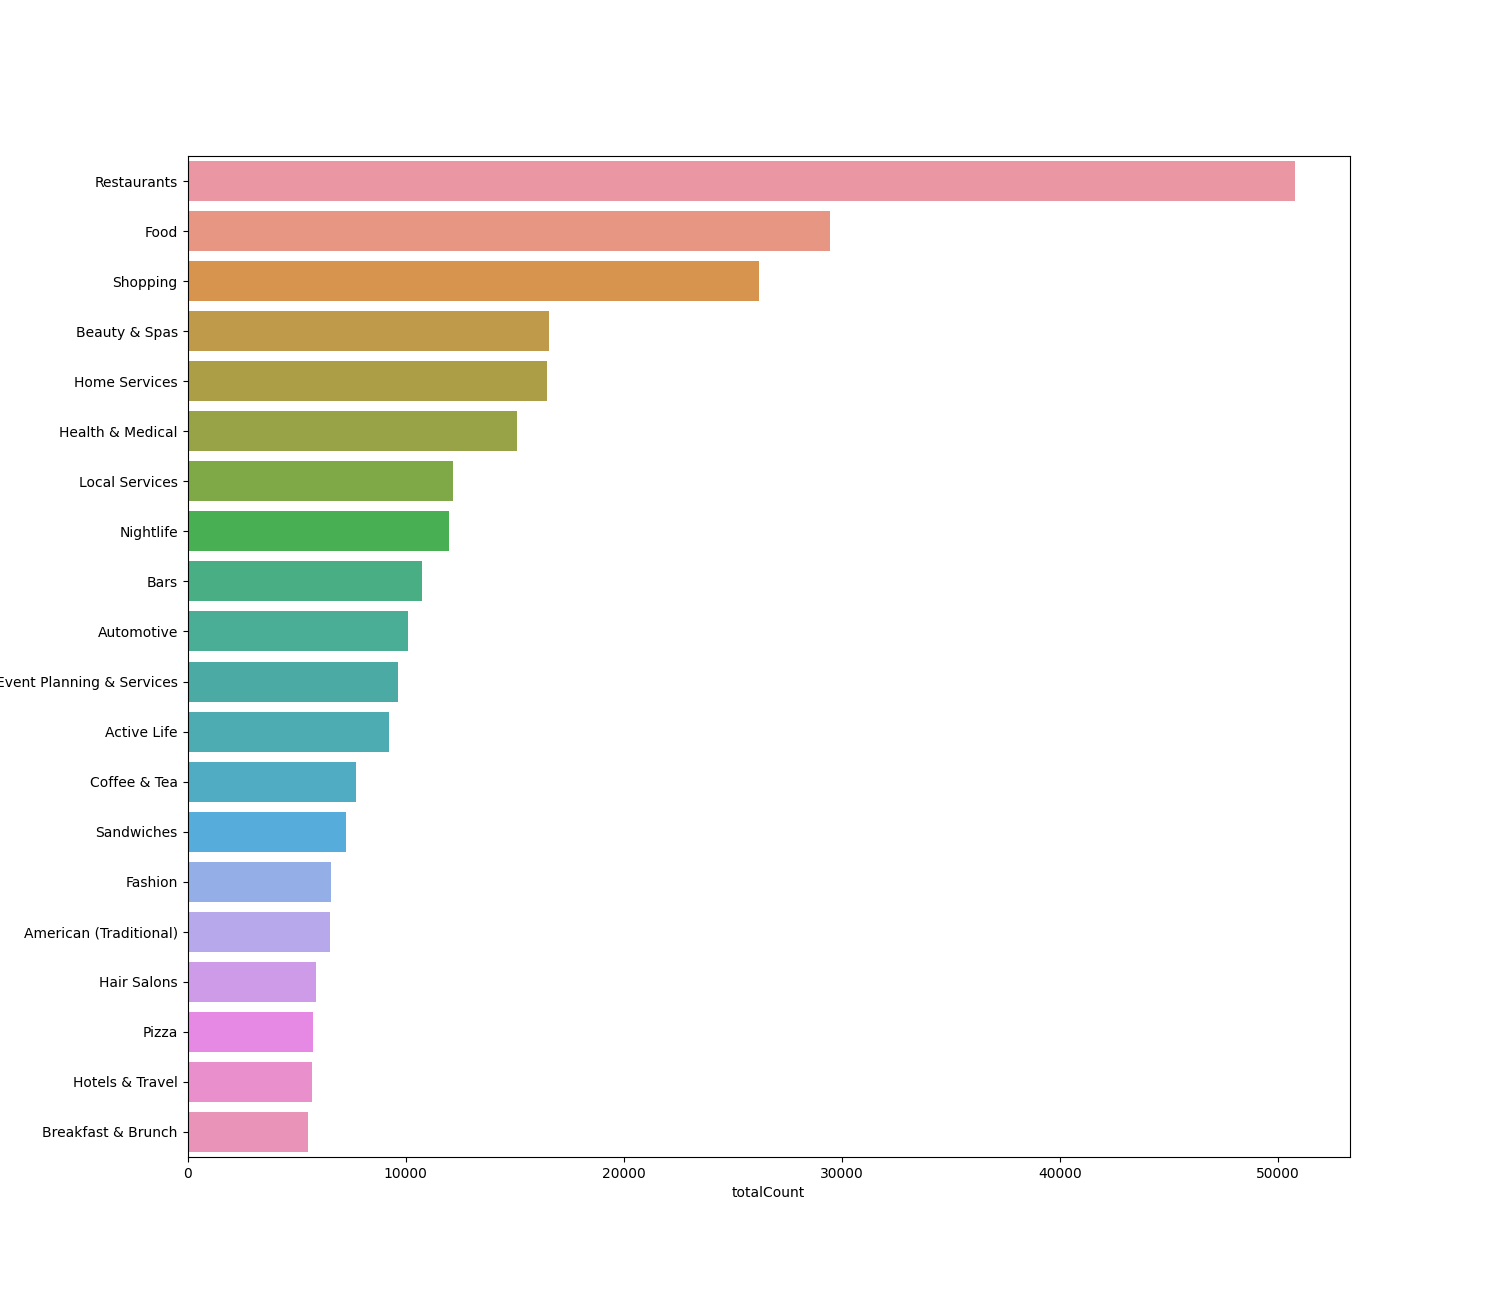

In [22]:
plt.figure(figsize=(15,13))
ax = sns.barplot(x='Total', y='categories', data=top20)
ax.set_xlabel('totalCount')
%matplot plt


# Do Yelp Reviews Skew Negative?
Oftentimes, it is said that the only people who write a written review are those who are extremely dissatisfied or extremely satisfied with the service received.

How true is this really? Let's try and answer this question.

# Loading User Data
Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [23]:
dfreviews = spark.read.json('s3://sta9760s2021ira/yelpdata/yelp_academic_dataset_review.json' )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
dfreviews.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the business_id and stars columns together for the user reviews data.

In [31]:
dfreviews.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

8635403


Let's begin by listing the business_id and stars columns together for the user reviews data.

In [25]:
dfreviews.select('business_id','stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the stars column to get a resultant dataframe that displays average stars per business as accumulated by users who took the time to submit a written review.

In [28]:
from pyspark.sql.functions import count,  col, avg
temp = dfreviews.select('business_id','stars')
catcounts = temp.groupby('business_id').agg(avg('stars').alias('avg(stars)'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [29]:
catcounts.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|       avg(stars)|
+--------------------+-----------------+
|uEUweopM30lHcVxjO...|              3.0|
|wdBrDCbZopowEkIEX...|4.538461538461538|
|L3WCfeVozu5etMhz4...|              4.2|
|bOnsvrz1VkbrZM1jV...|              3.8|
|R0IJhEI-zSJpYT1YN...|3.606060606060606|
+--------------------+-----------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by business_id.

<br>
First we reduce the original business dataframe for columns we need

In [ ]:
businessreduced = df.select('business_id','name','city','state','stars')

In [36]:
businessreduced.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

160585

Joining the dataframes

In [92]:
businessratings = businessreduced.join(catcounts, "business_id")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [93]:
businessratings.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+----------+-----+-----+------------------+
|         business_id|                name|      city|state|stars|        avg(stars)|
+--------------------+--------------------+----------+-----+-----+------------------+
|--JuLhLvq3gyjNnXT...|    CheraBella Salon|   Peabody|   MA|  5.0|               5.0|
|--_nBudPOb1lNRgKf...|Mezcal Cantina & ...|  Columbus|   OH|  4.0|             3.875|
|--kyOk0waSrCDlbSv...|    Red Table Coffee|    Austin|   TX|  4.0|3.8666666666666667|
|--z9usx6Fin8P_f0v...|          WonderWell|    Austin|   TX|  5.0|               5.0|
|-0qeY1293steyCqYh...|         Avalon Oaks|Wilmington|   MA|  3.5|             3.375|
+--------------------+--------------------+----------+-----+-----+------------------+
only showing top 5 rows

We compute a new dataframe that calculates what we will call the skew (for lack of a better word) between the avg stars accumulated from written reviews and the actual star rating of a business (ie: the average of stars given by reviewers who wrote an actual review and reviewers who just provided a star rating).

The formula you can use is something like:

(row['avg(stars)'] - row['stars']) / row['stars']
If the skew is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If skew is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [95]:
from pyspark.sql.functions import col
#skewdf = businessratings.toPandas()
skewdf = businessratings.withColumn("k", (col("avg(stars)")- col("stars")) / col("stars"))
skewdf.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- avg(stars): double (nullable = true)
 |-- k: double (nullable = true)

We convert the skew to float, convert the dataframe to a pandas dataframe and then plot it in seaborn

In [97]:
skewdf1 = skewdf.withColumn("k", col("k").cast("Float"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [99]:
skewdf2 = skewdf1.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

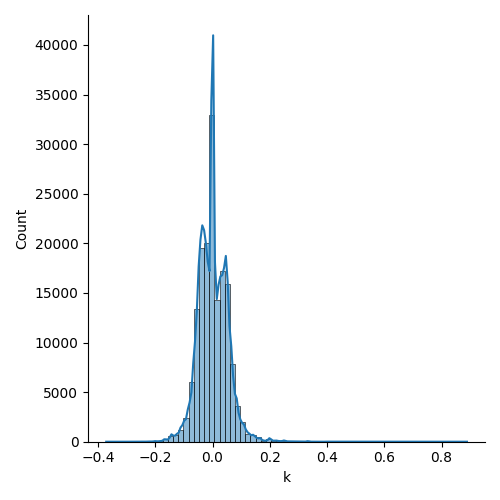

In [103]:
plt.figure(figsize = (20,20))
sns.displot(x='k', data = skewdf2, bins = 70, kde=True)
%matplot plt

In [105]:
skewdf2['k'].describe()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

count    160585.000000
mean          0.001144
std           0.051424
min          -0.371429
25%          -0.033333
50%           0.000000
75%           0.034722
max           0.888889
Name: k, dtype: float64

# Do the reviews skew positive or negative?
The yelp reviews skew slightly greater than 0. Thus we can conclude that the reviews are favourable to the businesses, even though by not a lot.

In [106]:
userdf = spark.read.json('s3://sta9760s2021ira/yelpdata/*user.json' )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [107]:
userdf.show(5)
userdf.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+---------+------------+------+--------------------+-------------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer| cool|               elite|fans|             friends|funny|     name|review_count|useful|             user_id|      yelping_since|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+---------+------------+------+--------------------+-------------------+
|         

In [108]:
dfreviews.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

We will join the user dataframe with the reviews dataframe and the business dataframe and try to come up with a new analysis

In [109]:
reviewsanduser = dfreviews.join(userdf, "user_id")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [110]:
reviewsanduser.show(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+----+-----+----+--------------------+-----+-----+------------+------+-------------------+
|             user_id|         business_id|cool|               date|funny|           review_id|stars|                text|useful|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer|cool|elite|fans|             friends|funny| name|review_count|useful|      yelping_since|
+--------------------+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+-------------+---------------+-------

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+--------------------+
|average_stars|                Cool|
+-------------+--------------------+
|            5|0.045822622107969155|
|            4|   6.978142076502732|
|            4|  0.9467213114754098|
|            4|  0.5733445096395641|
+-------------+--------------------+
only showing top 4 rows

In [122]:
from pyspark.sql.functions import count,  col, avg

avgstars = reviewsanduser.groupby('average_stars').agg(avg('compliment_cool').alias('Cool')).sort(col("average_stars").desc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [132]:
avgstars.show(100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+--------------------+
|average_stars|                Cool|
+-------------+--------------------+
|          5.0|0.045822622107969155|
|         4.99|   6.978142076502732|
|         4.98|  0.9467213114754098|
|         4.97|  0.5733445096395641|
|         4.96|  0.5866495507060334|
|         4.95|  0.4963008631319359|
|         4.94|  15.682317215603831|
|         4.93| 0.23924307276413606|
|         4.92| 0.30864895421141886|
|         4.91|   0.543117744610282|
|          4.9|  0.9127159946832077|
|         4.89| 0.36631358398323827|
|         4.88| 0.39090227443139214|
|         4.87|  0.3108702021681805|
|         4.86| 0.49773692639788314|
|         4.85|  0.5910083727702948|
|         4.84|  1.6213262084041777|
|         4.83|  0.3652192265076769|
|         4.82|  0.6731542753341119|
|         4.81|  2.1589726372335067|
|          4.8|  0.1972398388576443|
|         4.79|  1.3948682224544293|
|         4.78|  1.1517520463533524|
|         4.77|  0.8808461649158152|
|

In [133]:
# plt.figure(figsize=(15,13))
# ax = sns.barplot(x='average_stars', y='Cool', data=avgstars)
# #ax.set_xlabel('totalCount')
# %matplot plt


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…